# Data Analysis on movies.

### Import necessary dependencies. Adjust the display settings.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 16})

### Read the data from a .cvs file and create a pandas DataFrame named movies.

In [2]:
movies = pd.read_csv('movies.csv')

### Rename the columns for convinence.

In [3]:
new_column_names = []

for col in movies.columns:
    new_column_names.append('_'.join(col.split()))

movies.columns = new_column_names

### Basic Statistics for quantitative attributes.

In [4]:
movies.describe()

,US_DVD_Sales,Production_Budget,Running_Time_(min),Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
count,5.640000e+02,3.200000e+03,1209.000000,2321.000000,2988.000000,2988.000000
mean,3.490155e+07,3.106917e+07,110.193548,54.336924,6.283467,29908.644578
std,4.589512e+07,3.558591e+07,20.171014,28.076593,1.252290,44937.582335
min,6.184540e+05,2.180000e+02,46.000000,1.000000,1.400000,18.000000
25%,9.906211e+06,6.575000e+06,95.000000,30.000000,5.600000,4828.500000
50%,2.033156e+07,2.000000e+07,107.000000,55.000000,6.400000,15106.000000
75%,3.779422e+07,4.200000e+07,121.000000,80.000000,7.200000,35810.500000
max,3.525821e+08,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


## The data needs some cleaning.

In [5]:
movies.replace('Unknown',np.nan, inplace=True)

### Let's find out how many null or not applicable values exist in each column.

In [6]:
movies.isnull().sum()

Title                        1
US_Gross                     7
Worldwide_Gross              7
US_DVD_Sales              2637
Production_Budget            1
Release_Date                 0
MPAA_Rating                605
Running_Time_(min)        1992
Distributor                232
Source                     365
Major_Genre                275
Creative_Type              446
Director                  1331
Rotten_Tomatoes_Rating     880
IMDB_Rating                213
IMDB_Votes                 213
dtype: int64

### Since we will be examining the ratings of the movies, let's drop the NaN and not applicable values for the IMDB Rating and Rotten Tomatoes Rating columns.

In [7]:
movies.dropna(subset=['IMDB_Rating', 'IMDB_Votes', 'US_Gross', 'Worldwide_Gross'], inplace=True)

### The number of datapoints we dropped is very small.

In [8]:
print('We have dropped {:.2f}% of the total datapoints.'.format((3201 - movies.shape[0]) *100 / 3201))

We have dropped 6.81% of the total datapoints.


### Some of the quantitative attributes, we are going to use, are strings so we transofrm them into numbers.

In [9]:
movies['US_Gross'] = pd.to_numeric(movies['US_Gross'])
movies['Worldwide_Gross'] = pd.to_numeric(movies['Worldwide_Gross'])
movies['IMDB_Votes'] = pd.to_numeric(movies['IMDB_Votes'])

## Let's look into the distributions of some of the attributes of the data.

### Plot a histogram of the Worlwide Gross of the movies.

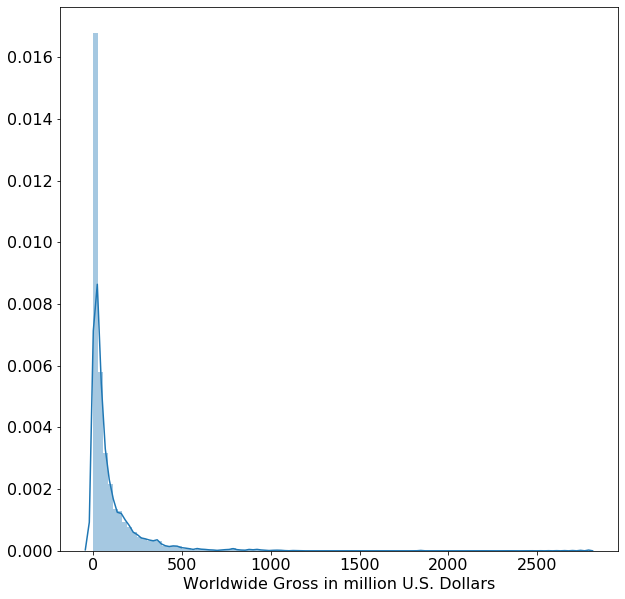

In [10]:
sns.distplot(movies['Worldwide_Gross']/10**6, bins=100)
plt.xlabel('Worldwide Gross in million U.S. Dollars', fontsize=16);

### Plot a histogram of the IMDB Rating of the movies.

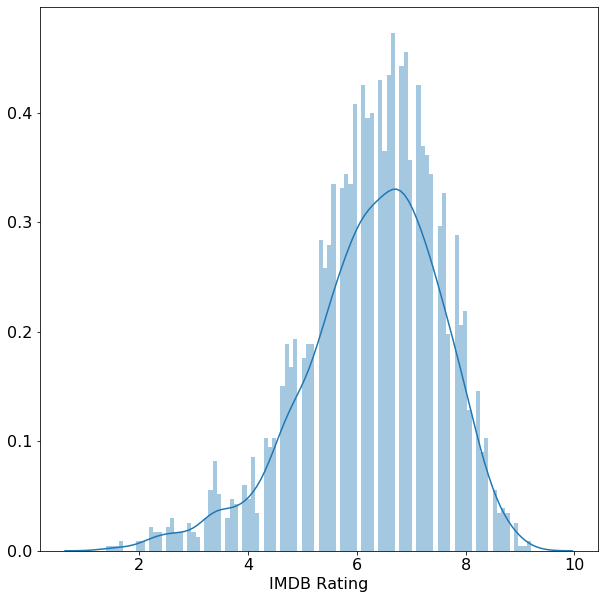

In [11]:
sns.distplot(movies['IMDB_Rating'], bins=100)
plt.xlabel('IMDB Rating', fontsize=16);

### Plot a histogram of the IMDB Votes of the movies.

Text(0.5, 0, 'Thousands of IMDB Votes')

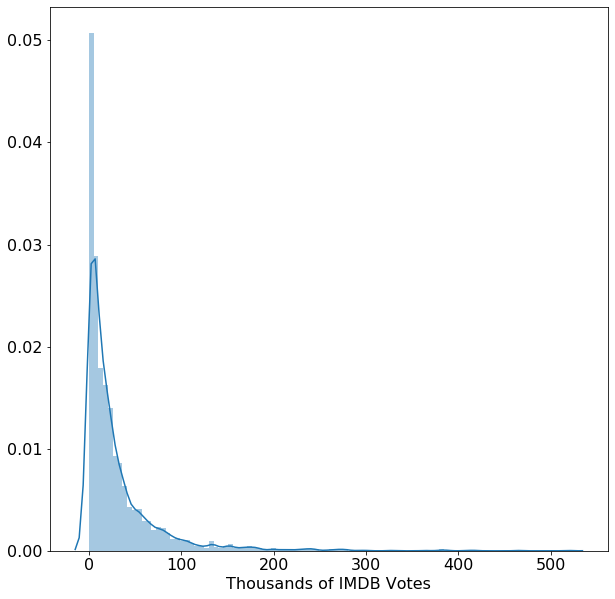

In [12]:
sns.distplot(movies['IMDB_Votes']/10**3, bins=100)
plt.xlabel('Thousands of IMDB Votes', fontsize = 16)

### Finally plot a histogram of the Rotten Tomatoes Rating of the movies.

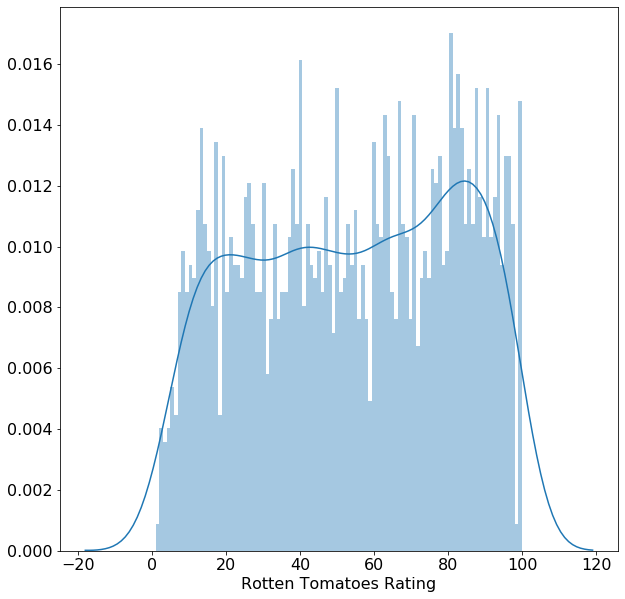

In [13]:
sns.distplot(movies['Rotten_Tomatoes_Rating'], bins=100)
plt.xlabel('Rotten Tomatoes Rating', fontsize=16);

### The Worldwide Gross as well as IMDB Votes of the movies seem to follow a power law distribution. The IMDB Rating follows a Normal distribution. The Rotten Tomatoes Rating looks like it can be approximated with a generalized Normal distribution. 

### To test these beliefs let's fit a scipy distribution with the data and compare it with the Kernel Density Estimate of the data.

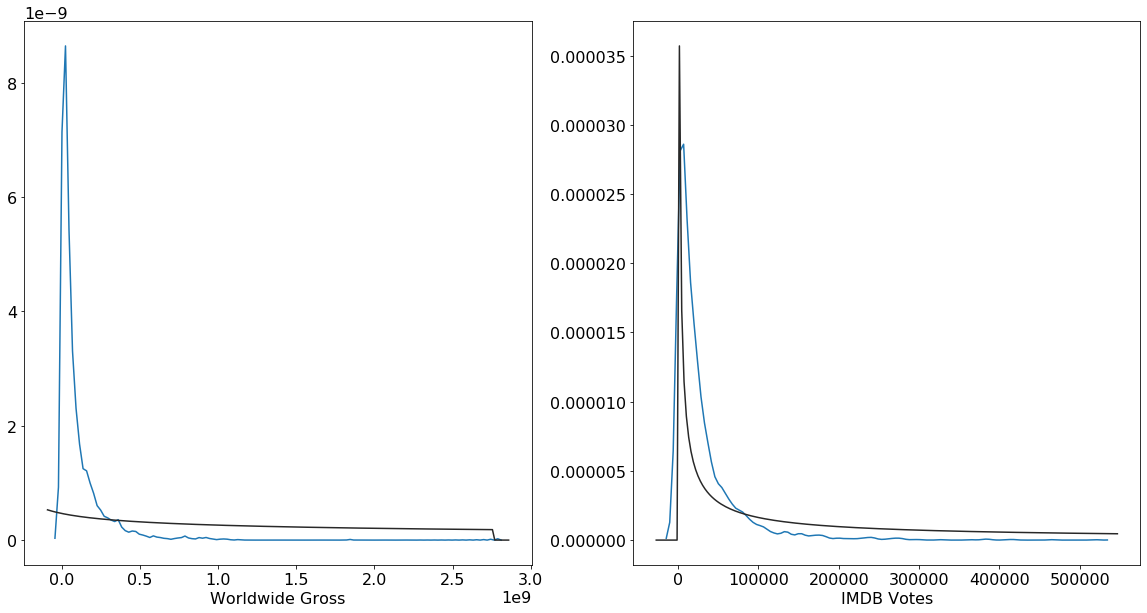

In [14]:
from scipy import stats
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(1, 2)

sns.distplot(movies['Worldwide_Gross'], bins=100, hist=False, fit=stats.powerlaw, ax=axes[0])
axes[0].set_xlabel('Worldwide Gross', fontsize=16)

sns.distplot(movies['IMDB_Votes'], hist=False, fit=stats.powerlaw, ax=axes[1])
axes[1].set_xlabel('IMDB Votes', fontsize=16);

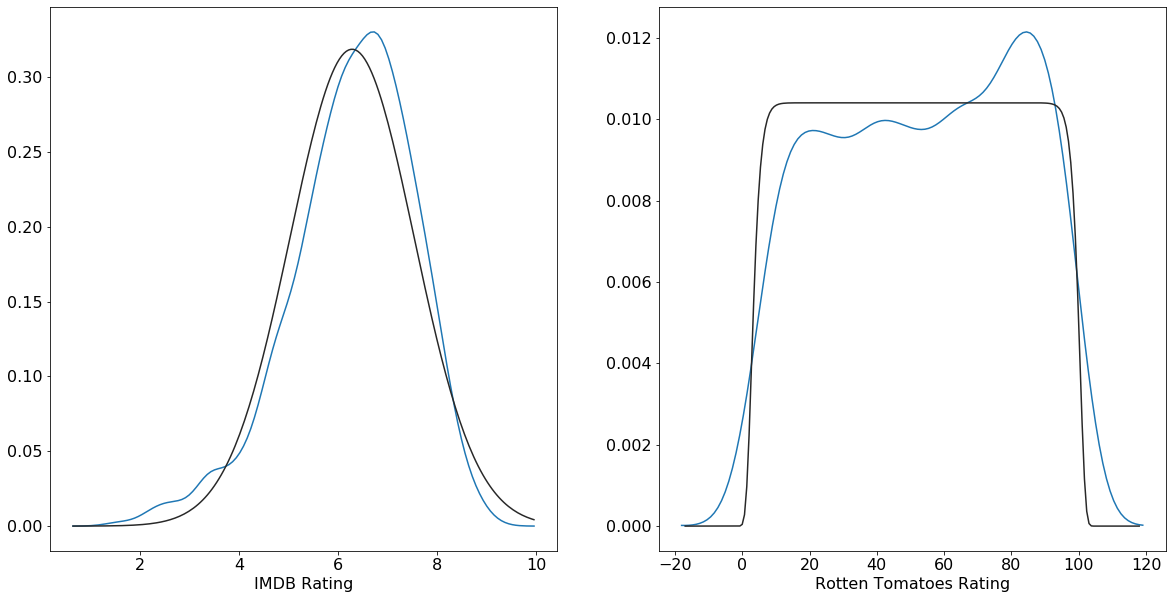

In [15]:
f, axes = plt.subplots(1, 2)

sns.distplot(movies['IMDB_Rating'], bins=100, hist=False, fit=stats.norm, ax=axes[0])
axes[0].set_xlabel('IMDB Rating', fontsize=16);

sns.distplot(movies['Rotten_Tomatoes_Rating'], bins=100, hist=False, fit=stats.gennorm, ax=axes[1])
axes[1].set_xlabel('Rotten Tomatoes Rating', fontsize=16);

In [16]:
plt.rcParams['figure.figsize'] = [10, 10]

### Next, let's look at the popularity of the different movie Genres.

In [17]:
genre = movies.groupby('Major_Genre').count().sort_values(by='Title', ascending=False)

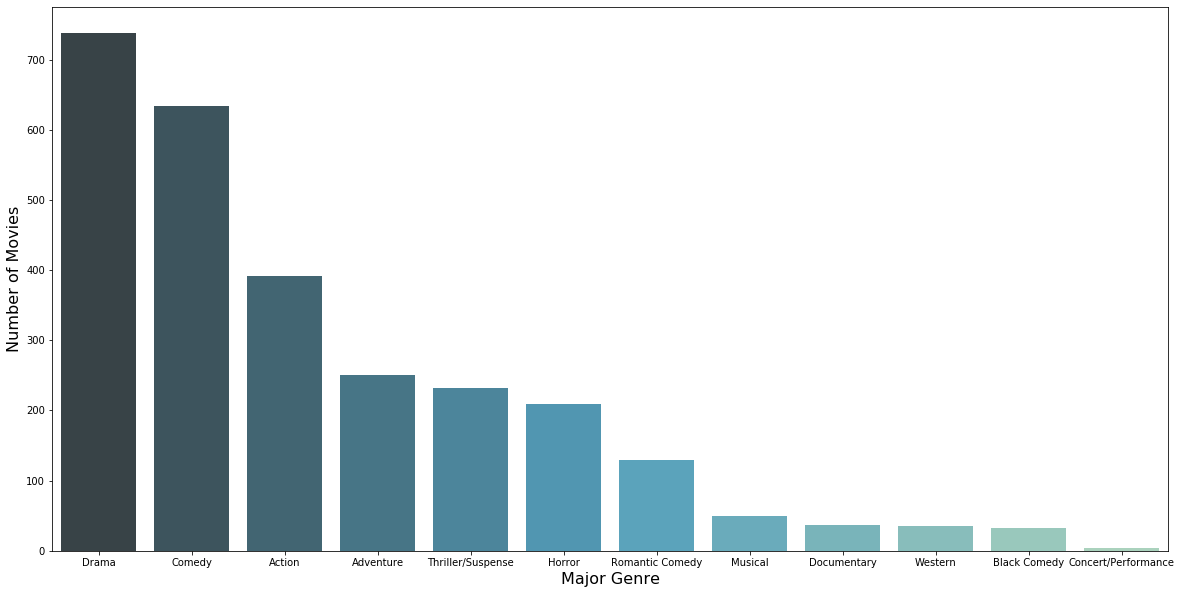

In [18]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 10})

sns.barplot(genre.index, genre['Title'], palette='GnBu_d')
plt.xlabel('Major Genre', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16);

In [19]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 16})

### Let's create a histogram with exponentally icreasing bin size, to visualize the number of movies that generate different sizes of Worldwide Gross.

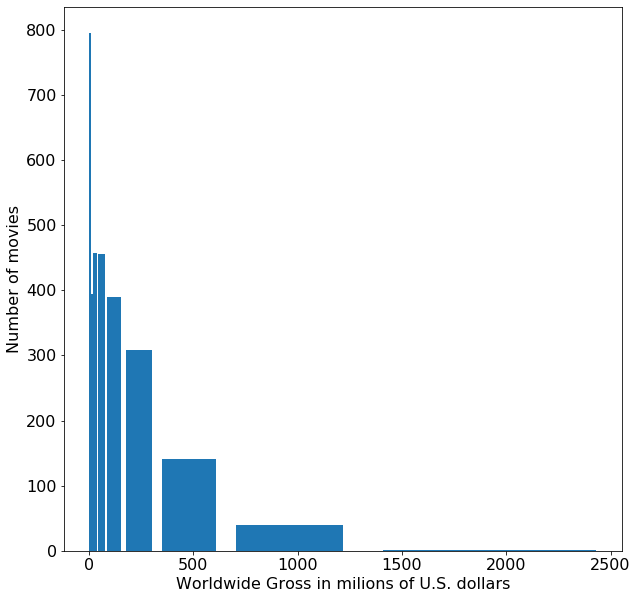

In [20]:
plt.hist(movies['Worldwide_Gross']/10**6, bins=[0, 10, 20, 40, 80, 160, 320, 640, 1280, 2560], rwidth=0.8)
plt.xlabel('Worldwide Gross in milions of U.S. dollars', fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16);

### Create the same histogram for IMDB Votes, to visualize the number of movies that achieve different popularity hights online.

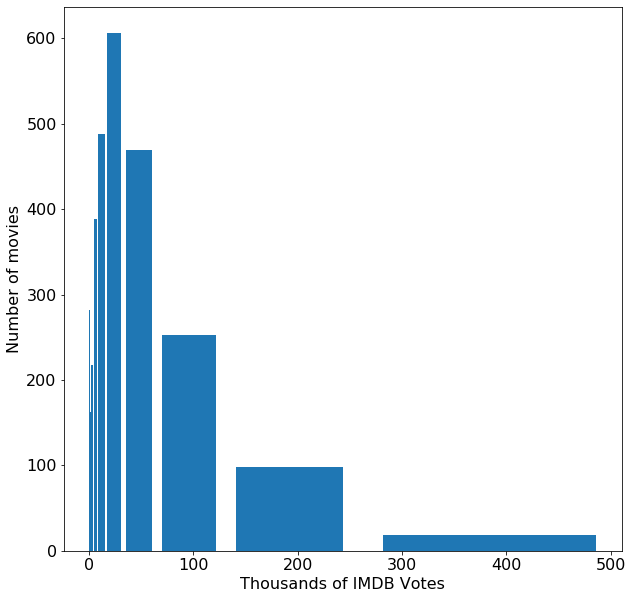

In [21]:
plt.hist(movies['IMDB_Votes']/10**3, bins=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512], rwidth=0.8)
plt.xlabel('Thousands of IMDB Votes', fontsize = 16)
plt.ylabel('Number of movies', fontsize = 16);

### It seems that the majority of movies generate a moderate gross and some a significant gross and only very few movies manage to generate a huge gross, just as the power law distribution suggests. This seems to be the case for online popularity as well.

## Let's look for correlations in the data.

### Create a scatterplot for Worldwide Gross and IMDB Votes.

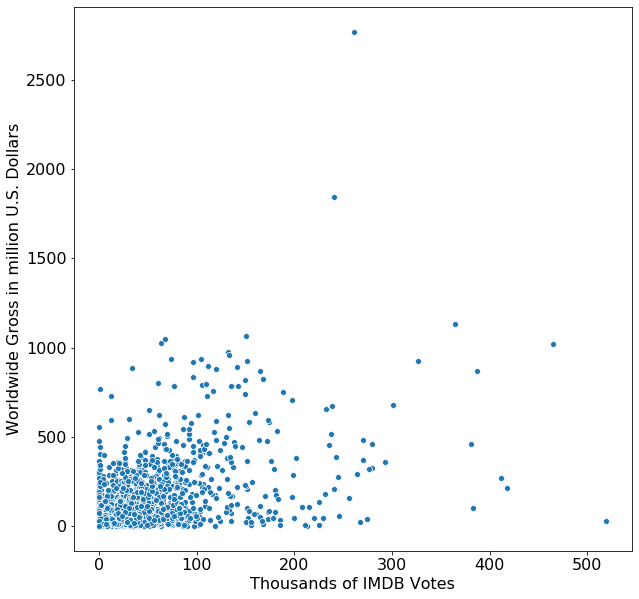

In [22]:
sns.scatterplot(movies['IMDB_Votes']/10**3, movies['Worldwide_Gross']/10**6)
plt.ylabel('Worldwide Gross in million U.S. Dollars', fontsize=16)
plt.xlabel('Thousands of IMDB Votes', fontsize = 16);

### A movie's gross and online popularity seem to be positively correlated. To visualize this let's create a log-log plot and fit a regression curve.

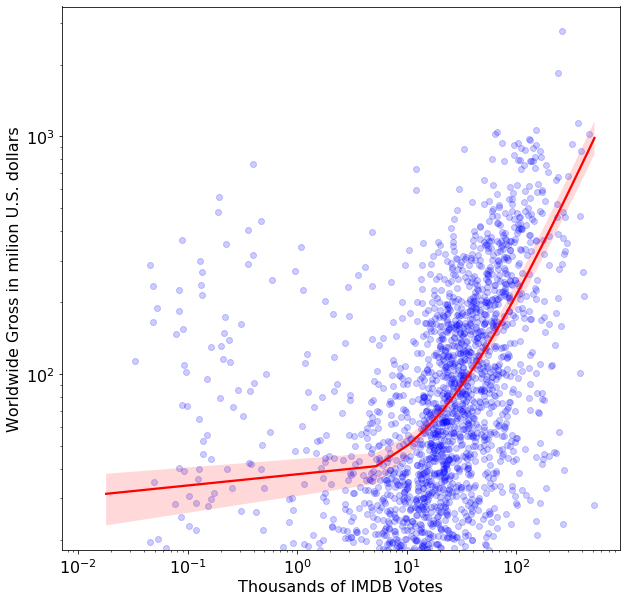

In [23]:
splot = sns.regplot(movies['IMDB_Votes']/10**3, movies['Worldwide_Gross']/10**6, 
                    scatter_kws = {'color': 'blue', 'alpha': 0.2}, line_kws = {'color': 'red'})
splot.set(xscale='log')
splot.set(yscale='log')

plt.ylabel('Worldwide Gross in milion U.S. dollars', fontsize=16)
plt.xlabel('Thousands of IMDB Votes', fontsize = 16);

### Check the scatterplots for the relevant attributes for more correlations.

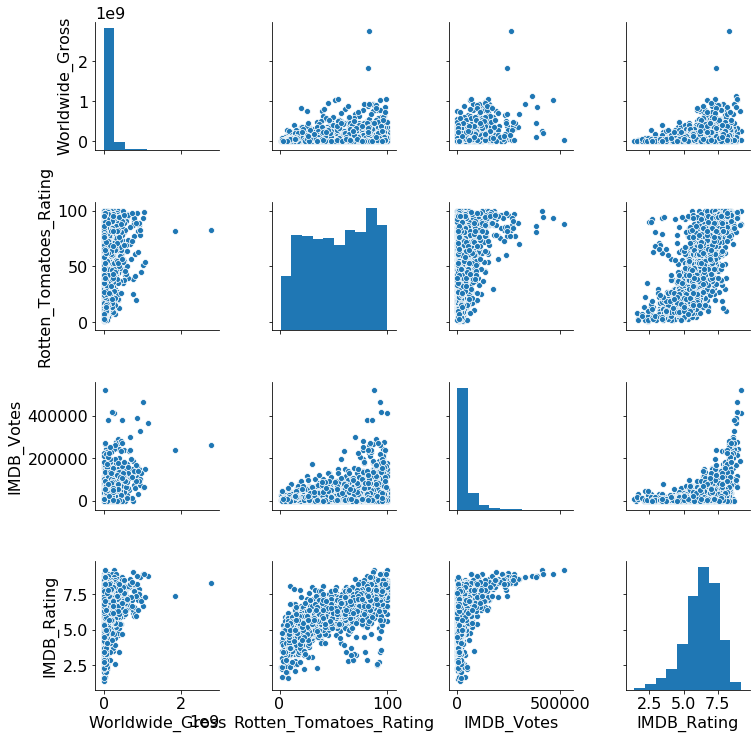

In [24]:
sns.pairplot(movies[['Worldwide_Gross', 'Rotten_Tomatoes_Rating', 'IMDB_Votes', 'IMDB_Rating']]);

### To quantify the correlations let's use the Spearman and Pearson correlation coefficients as well as the p-value.

In [25]:
from scipy import stats

def correlations(x, y):
    spearman = stats.spearmanr(x, y)
    pearson = stats.pearsonr(x, y)

    print("Spearman correlation coefficient for {} and {}:".format(x.name, y.name), spearman.correlation)
    print("Pearson correlation coefficient for {} and {}:".format(x.name, y.name), pearson[0])
    print("P-value correlation coefficient for {} and {}:".format(x.name, y.name), spearman.pvalue)
    print("")

In [26]:
no_null_tomatoes = movies.dropna(subset=['Rotten_Tomatoes_Rating'])

correlations(no_null_tomatoes['Rotten_Tomatoes_Rating'], no_null_tomatoes['IMDB_Rating'])
correlations(movies['IMDB_Votes'], movies['IMDB_Rating'])
correlations(no_null_tomatoes['IMDB_Votes'], no_null_tomatoes['Rotten_Tomatoes_Rating'])

correlations(no_null_tomatoes['Worldwide_Gross'], no_null_tomatoes['Rotten_Tomatoes_Rating'])
correlations(movies['Worldwide_Gross'], movies['IMDB_Rating'])
correlations(movies['Worldwide_Gross'], movies['IMDB_Votes'])

Spearman correlation coefficient for Rotten_Tomatoes_Rating and IMDB_Rating: 0.7764294249248916
Pearson correlation coefficient for Rotten_Tomatoes_Rating and IMDB_Rating: 0.742951213637465
P-value correlation coefficient for Rotten_Tomatoes_Rating and IMDB_Rating: 0.0

Spearman correlation coefficient for IMDB_Votes and IMDB_Rating: 0.46484476200236796
Pearson correlation coefficient for IMDB_Votes and IMDB_Rating: 0.4682516204844301
P-value correlation coefficient for IMDB_Votes and IMDB_Rating: 8.098125862107706e-160

Spearman correlation coefficient for IMDB_Votes and Rotten_Tomatoes_Rating: 0.3154803339367651
Pearson correlation coefficient for IMDB_Votes and Rotten_Tomatoes_Rating: 0.3373097958991186
P-value correlation coefficient for IMDB_Votes and Rotten_Tomatoes_Rating: 2.5866314587481135e-53

Spearman correlation coefficient for Worldwide_Gross and Rotten_Tomatoes_Rating: 0.10971723308898822
Pearson correlation coefficient for Worldwide_Gross and Rotten_Tomatoes_Rating: 0.16

### <ul><li> There is a strong correlation between IMDB Rating and Rotten Tomatoes Rating. Makes sense sicne both measure the same thing, movie quality.</li><br><li> There is a moderetly strong correlation between the Worldwide Gross and the IMDB Votes just as we detected with the plots.</li><br><li> There is almost no correlation between Worldwide Gross and Rotten Tomatoes Rating. It seems the critics are not biased towards high profile movies.</li></ul>

### To visualize the strong correlation between the IMDB Rating and the Rotten Tomatoes Rating let's create a scatterplot and fit a regression line.

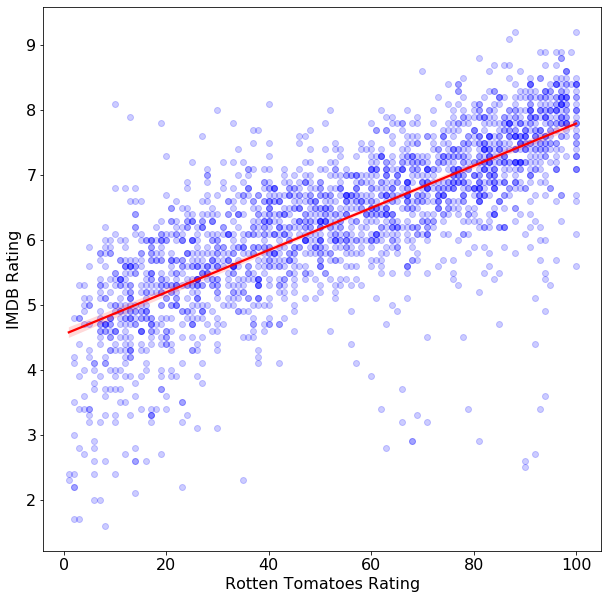

In [27]:
sns.regplot(no_null_tomatoes['Rotten_Tomatoes_Rating'], no_null_tomatoes['IMDB_Rating'], 
            scatter_kws = {'color': 'blue', 'alpha': 0.2}, line_kws = {'color': 'red'})

plt.ylabel('IMDB Rating', fontsize=16)
plt.xlabel('Rotten Tomatoes Rating', fontsize=16);

### Do the same for Worldwide Gross and IMDB Votes.

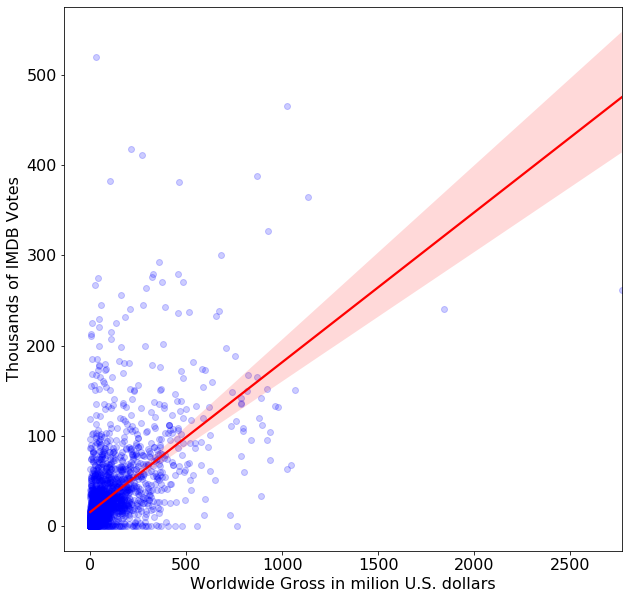

In [28]:
sns.regplot(movies['Worldwide_Gross']/10 ** 6, movies['IMDB_Votes']/10**3,
            scatter_kws = {'color': 'blue', 'alpha': 0.2}, line_kws = {'color': 'red'})

plt.ylabel('Thousands of IMDB Votes', fontsize = 16)
plt.xlabel('Worldwide Gross in milion U.S. dollars', fontsize=16);

### Create a barplot with the mean gross for each Genre to visualize the distribution of Worldwide Gross across the different Genres.

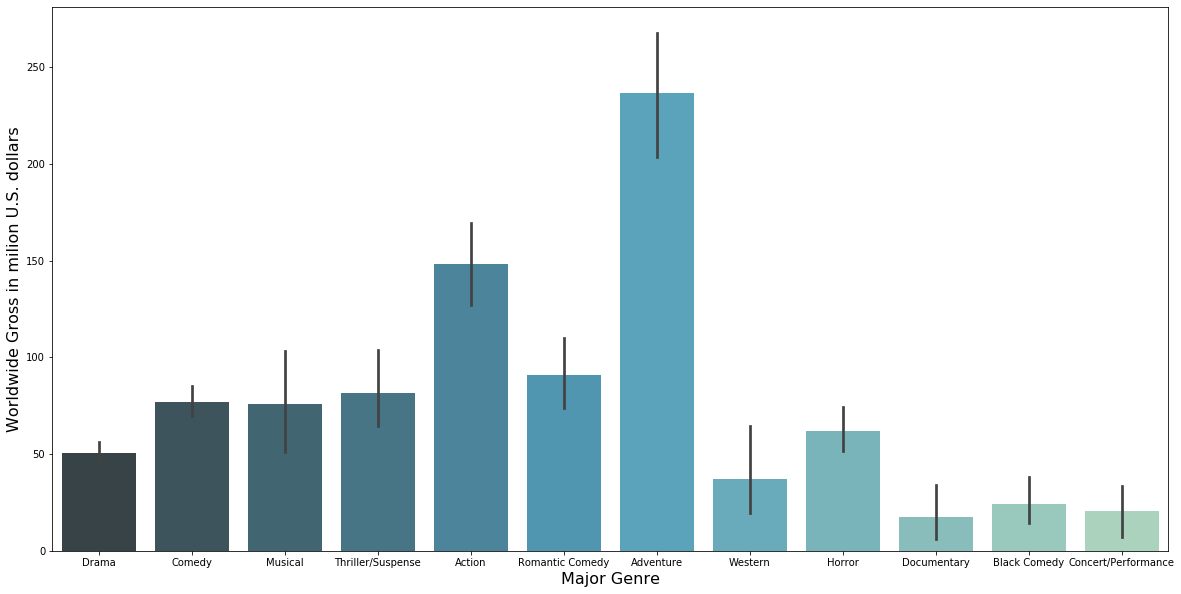

In [29]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 10})

sns.barplot(movies['Major_Genre'], movies['Worldwide_Gross']/10 ** 6, palette='GnBu_d')
plt.ylabel('Worldwide Gross in milion U.S. dollars', fontsize=16)
plt.xlabel('Major Genre', fontsize=16);

In [30]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 16})

### Let's use some t-tests to see if the diferences in gross between the different Genres are statistically significant.

In [31]:
def t_test(genre1, genre2):
    x = movies[movies['Major_Genre'] == genre1]['Worldwide_Gross']
    y = movies[movies['Major_Genre'] == genre2]['Worldwide_Gross']
    
    print('The p-value for genres {} and {} is:'.format(genre1, genre2) ,stats.ttest_ind(x, y).pvalue)

### Low p-value indicates that the difference between the means are not statistically significant. The opposite is also true. For p-values below 5% to 1% the difference is not considered statistically important.

In [32]:
t_test('Action', 'Adventure')
t_test('Action', 'Romantic Comedy')
t_test('Adventure', 'Romantic Comedy')
t_test('Action', 'Drama')

The p-value for genres Action and Adventure is: 3.2950422978711258e-06
The p-value for genres Action and Romantic Comedy is: 0.0029288205419274087
The p-value for genres Adventure and Romantic Comedy is: 4.30436148381124e-09
The p-value for genres Action and Drama is: 2.569708713244876e-27


### For some Genres the difference between their means are not significantly important. Such are Action movies and Adventure movies.

In [33]:
t_test('Documentary', 'Black Comedy')
t_test('Western', 'Horror')
t_test('Western', 'Drama')
t_test('Horror', 'Comedy')

The p-value for genres Documentary and Black Comedy is: 0.4852990804861519
The p-value for genres Western and Horror is: 0.08505663777559745
The p-value for genres Western and Drama is: 0.3490499125616884
The p-value for genres Horror and Comedy is: 0.06217939662039308


### For other Genres the difference are indeed statistically important.

## They say that "They don't make good movies anymore", maybe we can answer the question with data.

### We will use the Release Date attribute as well as the IMDB Rating and Rotten Tomatoes Rating.<br>First we must clean up the Release Date data and create some new columns in the movies DataFrame.

In [34]:
movies['Release_Date'].replace('TBD', np.nan, inplace=True)
movies['Release_Date'].dropna()

0       12-Jun-98
1        7-Aug-98
2       28-Aug-98
4        9-Oct-98
6        4-Apr-99
          ...    
3195     2-Oct-09
3196    31-Oct-08
3198    11-Aug-06
3199    28-Oct-05
3200    17-Jul-98
Name: Release_Date, Length: 2981, dtype: object

In [35]:
def to_str(row):
    row_as_string = str(row)
    no_spaces = row_as_string.split()[-1]
    year = no_spaces[-2:]
    
    if not year.isdigit():
        return np.nan
    return year

movies['Year'] = movies['Release_Date'].apply(lambda row: to_str(row))
movies['Year'] = movies['Year'].dropna()

### Create a column for the release year of each movie.

In [36]:
movies['Year'] = pd.to_numeric(movies['Year'])

def to_year(row):
    #1915 - 2011    
    if row >= 15:
        row += 1900
    else:
        row += 2000
    return row
    
movies['Year'] = movies['Year'].apply(lambda row: to_year(row))

In [37]:
movies['Year']

0       1998.0
1       1998.0
2       1998.0
4       1998.0
6       1999.0
         ...  
3195    2009.0
3196    2008.0
3198    2006.0
3199    2005.0
3200    1998.0
Name: Year, Length: 2983, dtype: float64

In [38]:
movies['Year'] = movies['Year'].fillna(0)
movies['Year'].astype('int')
movies = movies[movies['Year'] != 0]

### Plot a histogram for the release year.

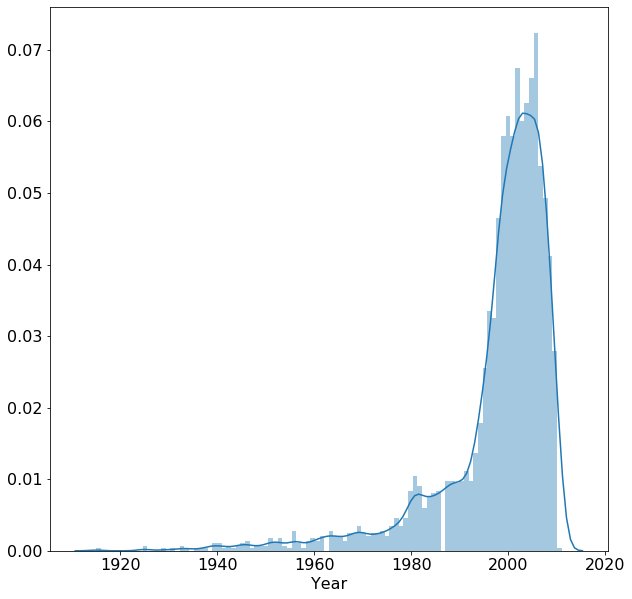

In [39]:
sns.distplot(movies['Year'], bins=100);

### There is a spike in the number of movies produced in the late 1990s and early 2000s.

### Create a column for the Decade of release.

In [40]:
def roundup(x):
    return int(math.floor(x / 10.0)) * 10

movies['Decade'] = movies['Year'].apply(lambda row: roundup(row))

### Create a bar plot for the average Rotten Tomatoes Rating for each decade with confidence intervals to visualize the overall quality of movies for each decade according to the CRITICS.

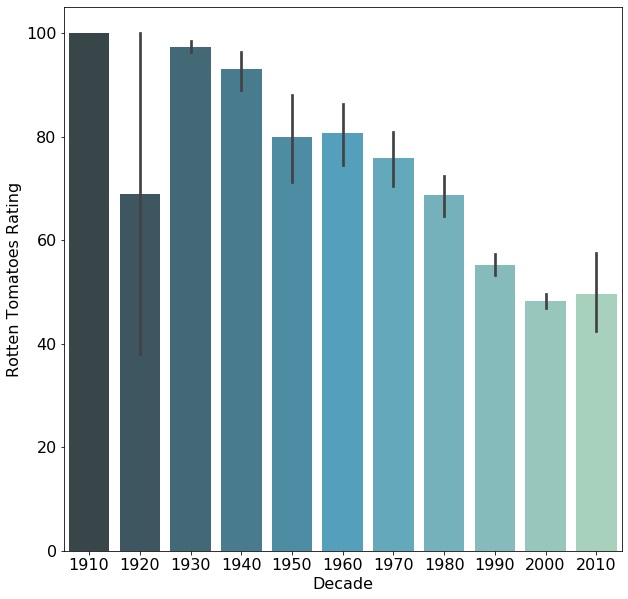

In [41]:
sns.barplot(movies['Decade'], movies['Rotten_Tomatoes_Rating'], palette='GnBu_d')
plt.ylabel('Rotten Tomatoes Rating');

### Create the same plot for IMDB Rating to visualize the overall quality of movies for each decade accoriding to the USERS.

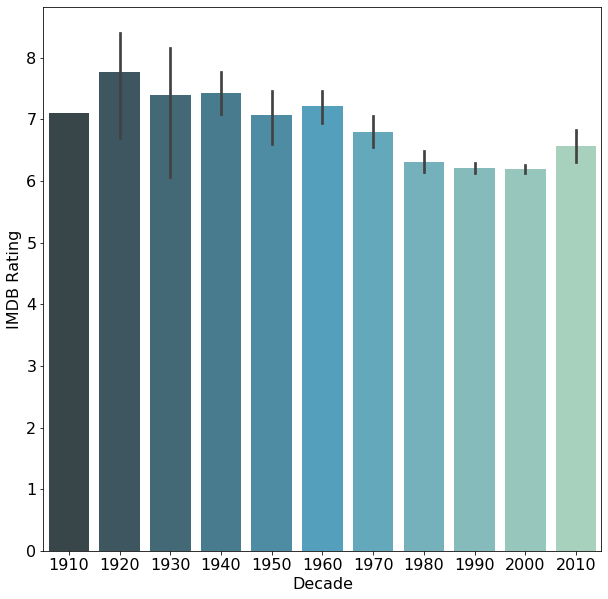

In [42]:
sns.barplot(movies['Decade'], movies['IMDB_Rating'], palette='GnBu_d')
plt.ylabel('IMDB Rating');

### According to the critics, there is a steady decrease in movie quality as time goes on. According to the users however the movie quality is not decreasing consistently, but stays roughly the same as time goes on.<br> Perhaps the users do not have as high standards for movie quality as critics.

### It is clear that the critics and the users sometimes have difference of opinion. To visualize this let's create a column for the difference in the IMDB Ratings and Rotten Tomatoes Ratings. Then, create a bar plot for the difference for each Decade.

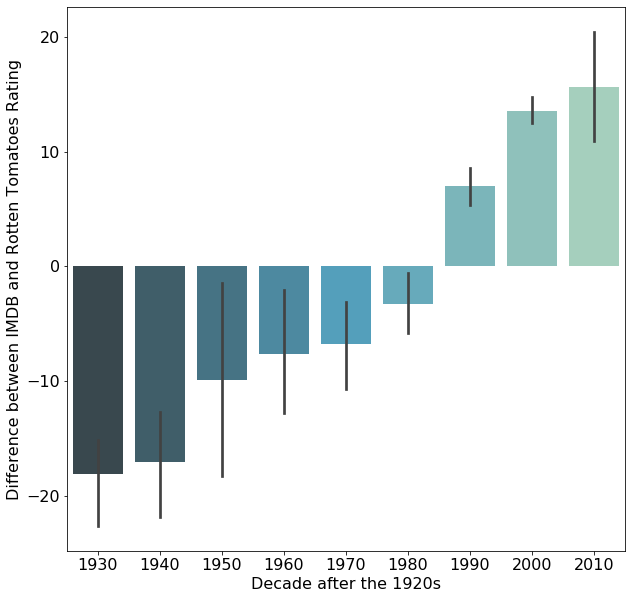

In [43]:
movies_after_20s = movies[movies['Decade'] > 1920]
difference_of_opinion = movies_after_20s['IMDB_Rating']*10 - movies_after_20s['Rotten_Tomatoes_Rating']

sns.barplot(movies_after_20s['Decade'], difference_of_opinion, palette='GnBu_d')
plt.xlabel('Decade after the 1920s')
plt.ylabel('Difference between IMDB and Rotten Tomatoes Rating');

### The critics highly disagree with the users on the superior quality of movies form earlier Decades but the difference of opinion decreases as time goes on. In the 1990s however, the users start to disagree with the critics on the superior quality of movies from later Decades being good.<br>Seeing how the IMDB Ratings (user's rating) show roughly similar quality for movies across multiple Decades, it would seem that the critics do not find the movies from later Decades as high quality as movies from earlier Decades.

### In conlcusion, when they say that "they don't make good movies anymore", it is probably the critics that hold that opinion.

## What is the difference in movie quality and movie gross between top rated and top earning directors?

### Create a pandas DataFrame for the top 100 earning and top 100 rated movie Directors with the Worldwide Gross and IMDB Rating.

In [44]:
no_null_directors = movies.dropna(subset=['Director'])
mean_stats = no_null_directors.groupby('Director')[['Worldwide_Gross', 'IMDB_Rating']].mean()

top_earning = mean_stats.sort_values(by='Worldwide_Gross', ascending=False)[:100]
top_rated  = mean_stats.sort_values(by='IMDB_Rating', ascending=False)[:100]

### Create a histogram of the IMDB Rating of the top earing and top rated director's movies.

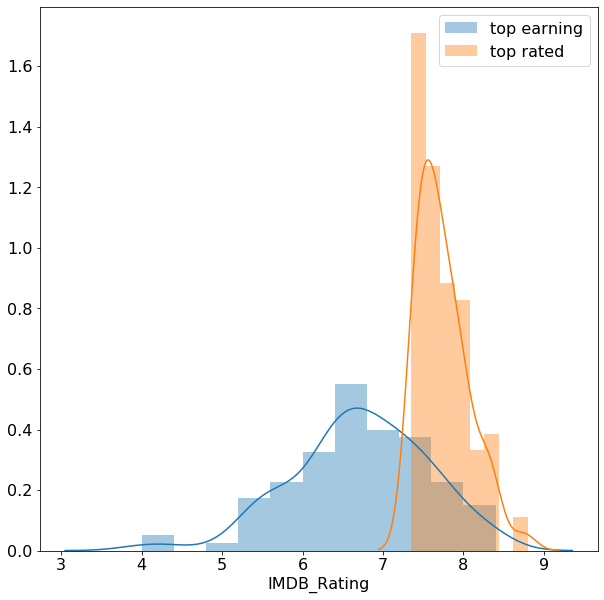

In [45]:
sns.distplot(top_earning['IMDB_Rating'], label='top earning')
sns.distplot(top_rated['IMDB_Rating'], label='top rated')
plt.legend();

### Create a histogram of the Worldwide Gross for the top earing and top rated director's movies.

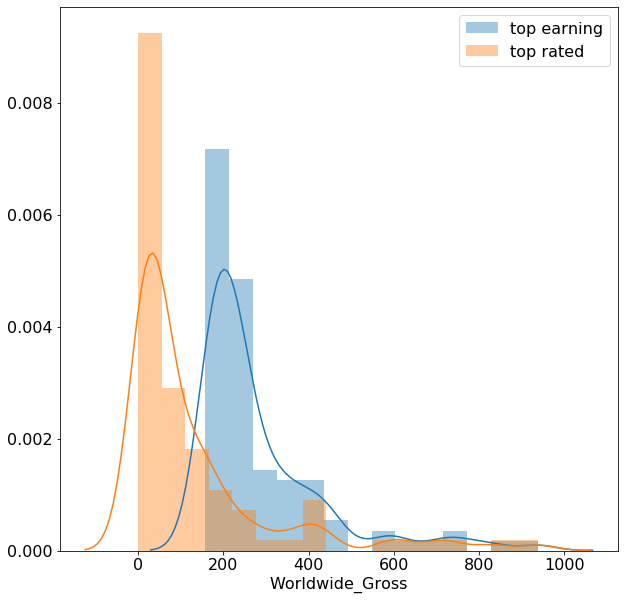

In [46]:
sns.distplot(top_earning['Worldwide_Gross']/10**6, label='top earning')
sns.distplot(top_rated['Worldwide_Gross']/10**6, label='top rated')
plt.legend();

### Use t-tests to see if the difference between the means is statistically significant.

In [47]:
t1 = stats.ttest_ind(top_earning['Worldwide_Gross'], top_rated['Worldwide_Gross'])
t2 = stats.ttest_ind(top_earning['IMDB_Rating'], top_rated['IMDB_Rating'])

print('t-statistic: {}, p-value: {}'.format(t1.statistic, t1.pvalue))
print('t-statistic: {}, p-value: {}'.format(t2.statistic, t2.pvalue))

t-statistic: 6.322240165798967, p-value: 1.6761335279691673e-09
t-statistic: -11.48506662278778, p-value: 9.955068205350151e-24


## One more question that we could answer is about the performance of a movie. More specifically, did the movie make more money than its budget or did it "flop" and which are the factors that affect its performance?

### Create some new columns to measure the performance.

In [48]:
movies['Performance'] = movies['Worldwide_Gross'] - movies['Production_Budget']
movies['Flop'] = movies['Performance'].loc[movies['Performance'] < 0]
movies['Win'] = movies['Performance'].loc[movies['Performance'] > 0]

movies['Production_Budget'].fillna(0, inplace=True)
flops = movies.dropna(subset=['Flop'])
wins = movies.dropna(subset=['Win'])

### Create a scatterplot for the Production Budget and the movies that flopped then a scatterplot for those that didn't flop.

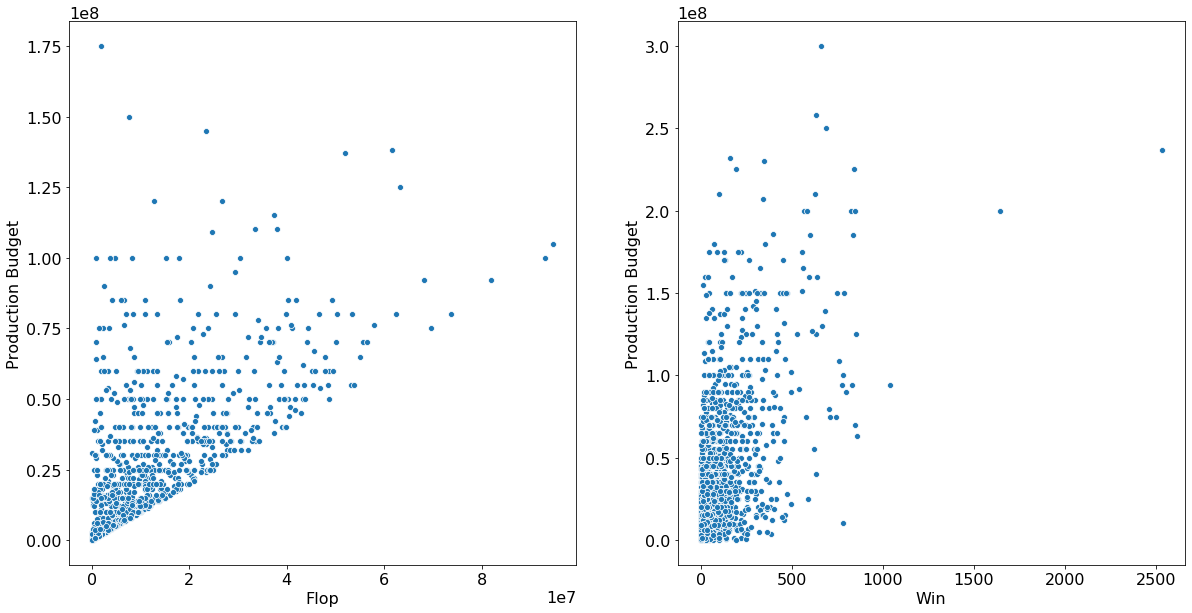

In [49]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(1, 2)

sns.scatterplot(movies['Flop']*(-1), movies['Production_Budget'], ax=axes[0])
axes[0].set_xlabel('Flop', fontsize=16)
axes[0].set_ylabel('Production Budget', fontsize=16)

sns.scatterplot(movies['Win']/10**6, movies['Production_Budget'], ax=axes[1])
axes[1].set_xlabel('Win', fontsize=16)
axes[1].set_ylabel('Production Budget', fontsize=16);

### Use Spearman and Pearson correlation coefficients to measure the correlations.

In [50]:
correlations(flops['Production_Budget'], flops['Flop']*(-1))
correlations(wins['Production_Budget'], wins['Win'])

Spearman correlation coefficient for Production_Budget and Flop: 0.721323586167505
Pearson correlation coefficient for Production_Budget and Flop: 0.6502714558216491
P-value correlation coefficient for Production_Budget and Flop: 8.874187477220665e-164

Spearman correlation coefficient for Production_Budget and Win: 0.60849218820663
Pearson correlation coefficient for Production_Budget and Win: 0.5748138157059466
P-value correlation coefficient for Production_Budget and Win: 2.794245836909296e-199



### The flops are strongly correleted with the budget of the movie. It makes sense because if a high profile movie flops, then the losses are big.<br> The wins are also strongly correlated with the budget, not as strongly though. It also makes sense because high profile movies are the ones that can generate the highest gross.

Spearman correlation coefficient for Worldwide_Gross and Production_Budget: 0.6783744478664522
Pearson correlation coefficient for Worldwide_Gross and Production_Budget: 0.672442870357445
P-value correlation coefficient for Worldwide_Gross and Production_Budget: 0.0



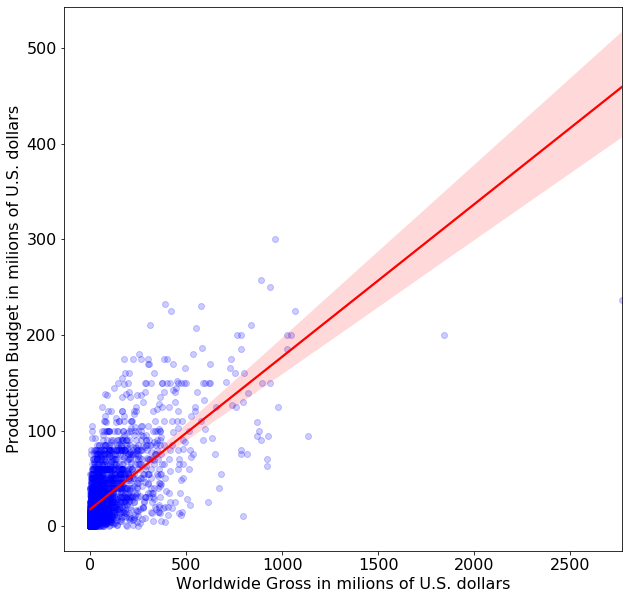

In [51]:
plt.rcParams['figure.figsize'] = [10, 10]

sns.regplot(movies['Worldwide_Gross']/10**6, movies['Production_Budget']/10**6, 
           scatter_kws = {'color': 'blue', 'alpha': 0.2}, line_kws = {'color': 'red'})
plt.xlabel('Worldwide Gross in milions of U.S. dollars', fontsize=16)
plt.ylabel('Production Budget in milions of U.S. dollars', fontsize=16)

correlations(movies['Worldwide_Gross'], movies['Production_Budget'])

### Create a scatterplot for the IMDB Rating and Rotten Tomatoes Rating and the movies that flopped.

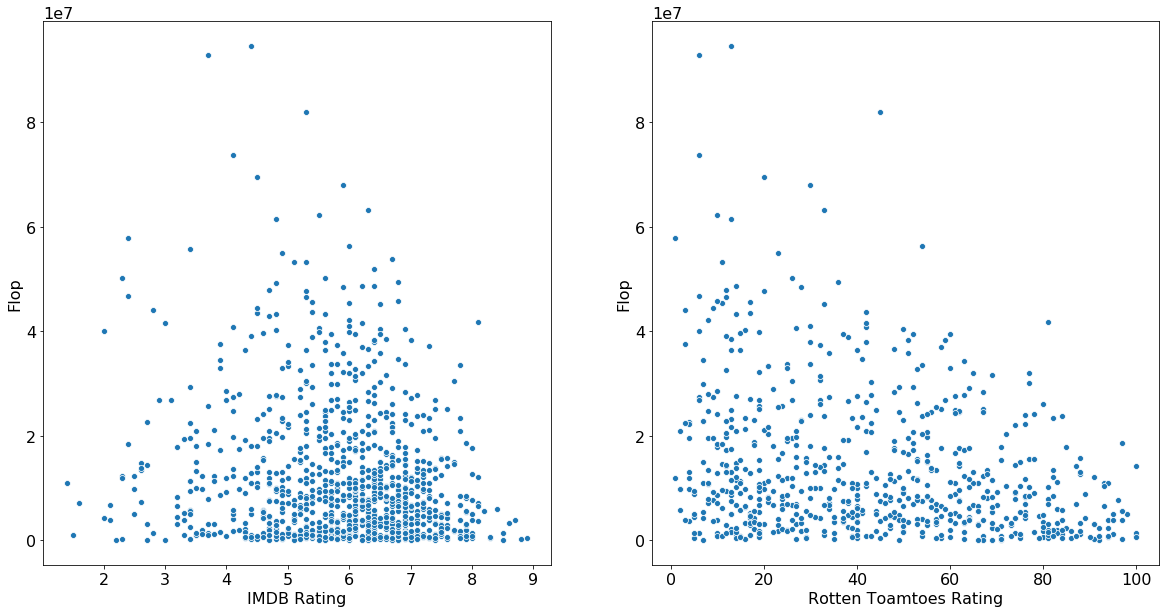

In [52]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(1, 2)

sns.scatterplot(movies['IMDB_Rating'], movies['Flop']*(-1), ax=axes[0])
axes[0].set_xlabel('IMDB Rating', fontsize=16)
axes[0].set_ylabel('Flop', fontsize=16)

sns.scatterplot(movies['Rotten_Tomatoes_Rating'], movies['Flop']*(-1), ax=axes[1])
axes[1].set_xlabel('Rotten Toamtoes Rating', fontsize=16)
axes[1].set_ylabel('Flop', fontsize=16);

In [53]:
correlations(flops['IMDB_Rating'], flops['Flop'])
correlations(flops['Rotten_Tomatoes_Rating'].fillna(0), flops['Flop'])

Spearman correlation coefficient for IMDB_Rating and Flop: 0.16451222529569565
Pearson correlation coefficient for IMDB_Rating and Flop: 0.17721102768290253
P-value correlation coefficient for IMDB_Rating and Flop: 1.3590608297730644e-07

Spearman correlation coefficient for Rotten_Tomatoes_Rating and Flop: -0.09311602182633523
Pearson correlation coefficient for Rotten_Tomatoes_Rating and Flop: 0.034427195655248655
P-value correlation coefficient for Rotten_Tomatoes_Rating and Flop: 0.0029839422183387913



### Interestingly, the correlation of Flop and the Ratings is very weak. This indicates that the quality of a movie is not the deciding factor that makes a movie flop. In other words good movies can flop too.

### Create a barplot for the number of flops in each decade to visualize the how the number of flopped movies changes overtime.

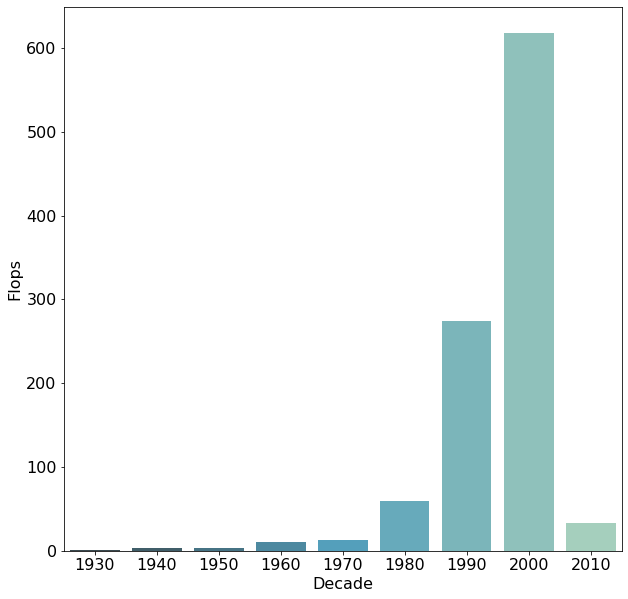

In [54]:
plt.rcParams['figure.figsize'] = [10, 10]
flops_per_decade = flops.groupby('Decade').agg({'Flop' : 'count'})

sns.barplot(flops_per_decade.index, flops_per_decade['Flop'], palette='GnBu_d')
plt.ylabel('Flops', fontsize=16);

### The number of flopped movies spikes in the 2000s. This makes sense because the overall number of movies also spikes in the 2000s. More movies means more flops as well.

### Create a barplot for the average losses of flops dor each Decade to visualize the change in losses for flopped movies overtime.

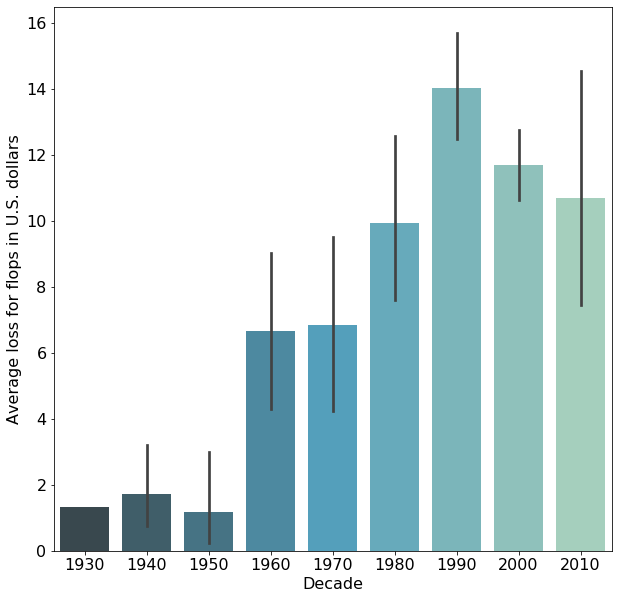

In [55]:
sns.barplot(flops['Decade'], flops['Flop']*(-1)/10**6, palette='GnBu_d')
plt.ylabel('Average loss for flops in U.S. dollars', fontsize=16);

### The highest losses occured in the 1990s and 2000s. Let's check the Production Budget for each decade since we know that the correlation is strong.

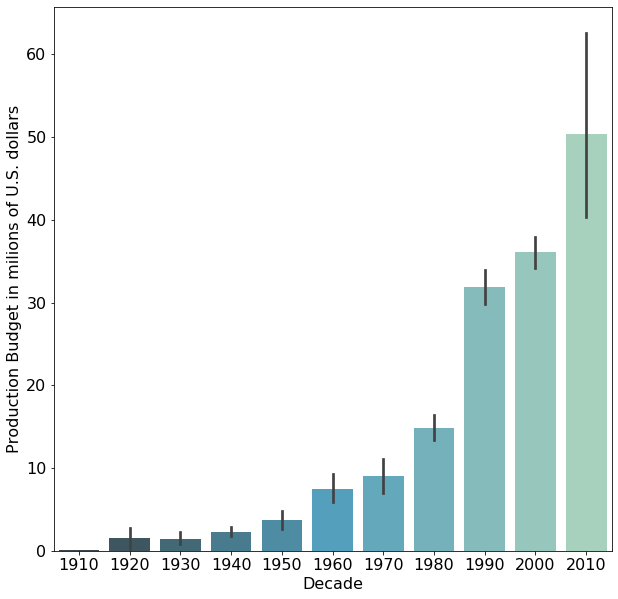

In [56]:
sns.barplot(movies['Decade'], movies['Production_Budget']/10**6, palette='GnBu_d')
plt.ylabel('Production Budget in milions of U.S. dollars', fontsize=16);

### It seems that the Production Budget continually increases as time goes on but interestingly, the losses for flops do not increase with it.